<a href="https://colab.research.google.com/github/darkxdd/Disease-Prediction-and-Drug-Recommendation-Prototype/blob/main/Major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.

!ls /root/.cache/kagglehub/datasets/jessicali9530/kuc-hackathon-winter-2018/2.complete

ls: cannot access '/root/.cache/kagglehub/datasets/jessicali9530/kuc-hackathon-winter-2018/2.complete': No such file or directory


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jessicali9530_kuc_hackathon_winter_2018_path = kagglehub.dataset_download('jessicali9530/kuc-hackathon-winter-2018')


print('Data source import complete.')

!cp -r /root/.cache/kagglehub/datasets/jessicali9530/kuc-hackathon-winter-2018/ /content/

100%|██████████| 40.7M/40.7M [00:01<00:00, 38.2MB/s]

Extracting files...


Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/kuc-hackathon-winter-2018/versions/2/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/kuc-hackathon-winter-2018/versions/2/drugsComTest_raw.csv
/content/kuc-hackathon-winter-2018/versions/2/drugsComTrain_raw.csv


In [4]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
# Let's see the input
data1 = pd.read_csv("/content/kuc-hackathon-winter-2018/versions/2/drugsComTrain_raw.csv")
data2 = pd.read_csv("/content/kuc-hackathon-winter-2018/versions/2/drugsComTest_raw.csv")

In [6]:
data1.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [7]:
data2.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [8]:
## So we are basically taking only review and condition so that we can
## classify the review for different conditions as part of multi class classification learning

In [9]:
data = pd.concat([data1,data2])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [10]:
data.shape

(215063, 7)

In [11]:
data = data[['review','condition']]
data.head()

,review,condition
0,"""It has no side effect, I take it in combinati...",Left Ventricular Dysfunction
1,"""My son is halfway through his fourth week of ...",ADHD
2,"""I used to take another oral contraceptive, wh...",Birth Control
3,"""This is my first time using any form of birth...",Birth Control
4,"""Suboxone has completely turned my life around...",Opiate Dependence


## Exploratory Data Analysis

In [12]:
data.isnull().sum()

,0
review,0
condition,1194


In [13]:
data.shape

(215063, 2)

In [14]:
# Since the null values are very less, we can remove the values for now.
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

,0
review,0
condition,0


In [16]:
data.shape

(213869, 2)

In [17]:
len(data.review.unique())

128449

In [18]:
len(data.condition.unique())

916

In [19]:
# We need to convert the label to numeric form, so we need to do preprocessing
# We are only going to be classifying conditions for which the count of reviews are more than 3000.

review_counts = data.condition.value_counts(ascending=False).reset_index()
review_counts

,condition,count
0,Birth Control,38436
1,Depression,12164
2,Pain,8245
3,Anxiety,7812
4,Acne,7435
...,...,...
911,Systemic Candidiasis,1
912,Wilson's Disease,1
913,unctional Gastric Disorde,1
914,Sepsis,1


In [20]:
valid_conditions = review_counts[review_counts['count']>3000]['condition'].tolist()
valid_conditions

['Birth Control',
 'Depression',
 'Pain',
 'Anxiety',
 'Acne',
 'Bipolar Disorde',
 'Insomnia',
 'Weight Loss',
 'Obesity',
 'ADHD',
 'Diabetes, Type 2',
 'Emergency Contraception',
 'High Blood Pressure',
 'Vaginal Yeast Infection']

In [21]:
df = data[data.condition.isin(valid_conditions)]
df.shape

(111564, 2)

So, we are left with 111564 rows of data with 14 classes of reviews.

In [22]:
# Target Classes/Labels
valid_conditions

['Birth Control',
 'Depression',
 'Pain',
 'Anxiety',
 'Acne',
 'Bipolar Disorde',
 'Insomnia',
 'Weight Loss',
 'Obesity',
 'ADHD',
 'Diabetes, Type 2',
 'Emergency Contraception',
 'High Blood Pressure',
 'Vaginal Yeast Infection']

In [23]:
df.review[:5]

,review
1,"""My son is halfway through his fourth week of ..."
2,"""I used to take another oral contraceptive, wh..."
3,"""This is my first time using any form of birth..."
6,"""He pulled out, but he cummed a bit in me. I t..."
7,"""Abilify changed my life. There is hope. I was..."


## Text Cleaning and Preprocessing

#### Something New: Contraction handling
'I'll be' -> 'I will be'

In [24]:
!pip install contractions
import contractions
contractions.fix("I'll")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.6 MB/s eta 0:00:00


'I will'

In [25]:

contractions.fix("aren't you")

'are not you'

#### So we need to use this contractions library to fix our text

In [26]:
def fix_contractions(text):
    new_word_list = []
    for word in text.split(' '):
        new_word_list.append(contractions.fix(word))
    new_text = ' '.join(new_word_list)
    return new_text

fix_contractions("Hi, Isn't it too late already")

'Hi, Is not it too late already'

In [27]:
## Another way is to create a contractions dictionary and use it to replace the words.

In [28]:
df.review[:50]

,review
1,"""My son is halfway through his fourth week of ..."
2,"""I used to take another oral contraceptive, wh..."
3,"""This is my first time using any form of birth..."
6,"""He pulled out, but he cummed a bit in me. I t..."
7,"""Abilify changed my life. There is hope. I was..."
9,"""I had been on the pill for many years. When m..."
11,"""I have taken anti-depressants for years, with..."
14,"""Started Nexplanon 2 months ago because I have..."
15,"""I have been taking Saxenda since July 2016. ..."
18,"""I&#039;ve been on every medicine under the su..."


In [29]:
# Apply fix_contractions on the review column
import pandas as pd
pd.options.mode.chained_assignment = None
df['review'] = df['review'].apply(lambda text: fix_contractions(text))

In [30]:
# Lower the text
df["review"] = df["review"].apply(lambda text: text.lower())

In [31]:
# Clean the text
import re

def clean_text(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

clean_text("Hi I am Mr..$%^Robot")

df["review"] = df["review"].apply(lambda text: clean_text(text))

In [32]:
df.review[:10]

,review
1,my son is halfway through his fourth week of i...
2,i used to take another oral contraceptive whic...
3,this is my first time using any form of birth ...
6,he pulled out but he cummed a bit in me i took...
7,abilify changed my life there is hope i was on...
9,i had been on the pill for many years when my ...
11,i have taken antidepressants for years with so...
14,started nexplanon 2 months ago because i have ...
15,i have been taking saxenda since july 2016 i ...
18,i039ve been on every medicine under the sun it...


## Splitting the data for training model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df['review'],df['condition'],test_size=0.3, stratify= df['condition'])

In [34]:
print('Train Shape: ',X_train.shape)
print('Test Shape: ',X_test.shape)

Train Shape:  (78094,)
Test Shape:  (33470,)


## Natural Language Processing for Text Data

In [35]:
# Check keras is installed or not
!pip show keras

Name: keras
Version: 3.8.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow


In [36]:
# Tokenize the sentences

# Necessary imports
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set Basic Parameters
max_features = 120000
maxlen = 750 # max number of words in a question to use

tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad the sentences
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [37]:
X_train

array([[   0,    0,    0, ...,   11,  120,  246],
       [   0,    0,    0, ...,    4, 1102,   20],
       [   0,    0,    0, ...,    1,  110,   78],
       ...,
       [   0,    0,    0, ..., 1034,    2, 1511],
       [   0,    0,    0, ..., 8070,   27,   15],
       [   0,    0,    0, ...,  784,  655, 1793]], dtype=int32)

In [38]:
X_test

array([[   0,    0,    0, ...,   29, 1652,    6],
       [   0,    0,    0, ...,   20,    3,  367],
       [   0,    0,    0, ...,  471,    3,   47],
       ...,
       [   0,    0,    0, ...,   24,   13,  375],
       [   0,    0,    0, ...,   15,   73,   57],
       [   0,    0,    0, ...,  322,   20,  346]], dtype=int32)

In [39]:
y_train

,condition
140441,Birth Control
109887,Depression
40508,Anxiety
138626,Birth Control
50232,Birth Control
...,...
128021,Birth Control
95580,Birth Control
82398,Bipolar Disorde
149394,Weight Loss


In [40]:
# We need to do label encoding for target classes

## Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [42]:
y_train

array([ 4,  5,  2, ...,  3, 13,  0])

In [43]:
le.classes_

array(['ADHD', 'Acne', 'Anxiety', 'Bipolar Disorde', 'Birth Control',
       'Depression', 'Diabetes, Type 2', 'Emergency Contraception',
       'High Blood Pressure', 'Insomnia', 'Obesity', 'Pain',
       'Vaginal Yeast Infection', 'Weight Loss'], dtype=object)

#### Now, we have our text converted into word_index and labels encoded, now we need to load embeddings for semantic understanding.

## Load Embeddings

In [44]:
# Imports
import gensim.downloader as api


# Download the GloVe 6B 100d model
model = api.load("glove-wiki-gigaword-300")

# Check if loaded correctly
# print(model["king"])

[==================================================] 100.0% 376.1/376.1MB downloaded


In [45]:
# Save the GloVe model in word2vec format
model.save_word2vec_format('glove-wiki-gigaword-300.word2vec.txt', binary=False)

In [46]:
# We can use it now from local
from gensim.models import KeyedVectors
# Load pre-trained embeddings (e.g., GloVe converted to Word2Vec format)
gensim_model = KeyedVectors.load_word2vec_format('/content/glove-wiki-gigaword-300.word2vec.txt', binary=False)
# Check if loaded correctly
print(gensim_model["king"])

[ 0.0033901 -0.34614    0.28144    0.48382    0.59469    0.012965
  0.53982    0.48233    0.21463   -1.0249    -0.34788   -0.79001
 -0.15084    0.61374    0.042811   0.19323    0.25462    0.32528
  0.05698    0.063253  -0.49439    0.47337   -0.16761    0.045594
  0.30451   -0.35416   -0.34583   -0.20118    0.25511    0.091111
  0.014651  -0.017541  -0.23854    0.48215   -0.9145    -0.36235
  0.34736    0.028639  -0.027065  -0.036481  -0.067391  -0.23452
 -0.13772    0.33951    0.13415   -0.1342     0.47856   -0.1842
  0.10705   -0.45834   -0.36085   -0.22595    0.32881   -0.13643
  0.23128    0.34269    0.42344    0.47057    0.479      0.074639
  0.3344     0.10714   -0.13289    0.58734    0.38616   -0.52238
 -0.22028   -0.072322   0.32269    0.44226   -0.037382   0.18324
  0.058082   0.26938    0.36202    0.13983    0.016815  -0.34426
  0.4827     0.2108     0.75618   -0.13092   -0.025741   0.43391
  0.33893   -0.16438    0.26817    0.68774    0.311     -0.2509
  0.0027749 -0.39809   

Cool, it's working

In [47]:
len(gensim_model["king"])

300

In [48]:
len(gensim_model["finance"])

300

In [49]:
# Create an Embedding Matrix: Map each word in your word_index to its vector
# in the pre-trained embeddings:

embedding_dim = 300
word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    if word in gensim_model:
        embedding_matrix[i] = gensim_model[word]

This code is typically used to populate an embedding matrix for a neural network using pre-trained word embeddings (such as GloVe or Word2Vec). The idea is to represent each word in your vocabulary as a vector of real numbers (embeddings) that capture the meaning of the word based on its context in large text corpora.

In [50]:
word_index['depression']

114

In [51]:
word_index['suicide']

1413

In [52]:
word_index['marriage']

2137

In [53]:
embedding_matrix[1:3]

array([[-1.32919997e-01,  1.69850007e-01, -1.43600002e-01,
        -8.87219980e-02,  7.95100033e-02, -1.42120004e-01,
        -2.42090002e-02, -2.62910008e-01, -7.48139992e-02,
        -2.35999990e+00,  3.48300010e-01, -9.17219967e-02,
        -5.39060012e-02,  3.04179996e-01, -1.32860005e-01,
         5.03409980e-03, -1.50560006e-01,  2.35620001e-03,
         6.83209971e-02,  3.42460006e-01,  3.98909986e-01,
         5.88129997e-01,  6.06179982e-02, -1.98709995e-01,
        -4.04650003e-01, -1.07060000e-01, -5.93119999e-03,
        -6.48419976e-01,  1.90799996e-01, -1.76300004e-01,
         9.24070030e-02,  3.86849999e-01, -3.10849994e-01,
        -3.25740010e-01, -1.68229997e+00,  2.53360003e-01,
        -2.46470004e-01, -1.08740002e-01,  7.64020020e-03,
         3.38800013e-01, -5.97359985e-02, -8.59399974e-01,
        -8.09639990e-02, -2.29809999e-01,  1.77090004e-01,
         8.20939988e-02,  7.44159997e-01,  3.68730009e-01,
         1.37400001e-01,  2.94079989e-01,  1.06470004e-0

#### Now our embedding matrix is created and now we will use this embedding matrix in our deep learning
#### model to understand the context better and hence we should be good to classify the review
#### and map them to relevant condition/label.

## PyTorch Model - BiLSTM

#### Helpful Links
Understanding Number Of Parameters: https://youtu.be/B08baRr2LlY <br>
requires_grad: https://pytorch.org/docs/stable/generated/torch.Tensor.requires_grad_.html <br>
nn.LSTM: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
<br> Cross Entropy Loss Function: https://www.datacamp.com/tutorial/the-cross-entropy-loss-function-in-machine-learning <br>
Cross Entropy Pytorch: https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html <br>
Optimizer.step() function : https://discuss.pytorch.org/t/how-are-optimizer-step-and-loss-backward-related/7350 <br>
Tensor.detach() : https://www.geeksforgeeks.org/tensor-detach-method-in-python-pytorch/ <br>
Softmax Activation function: https://www.analyticsvidhya.com/blog/2021/04/introduction-to-softmax-for-neural-network/

In [54]:
# Imports Required
import torch as t
import torch.nn as nn
import torch.nn.functional as F

embed_size = 300 # how big is each word vector
max_features = 120000 # how many unique words to use (i.e num rows in embedding vector)

class BiLSTM(nn.Module):

    def __init__(self):
        super(BiLSTM, self).__init__()
        self.hidden_size = 64
        dropout = 0.1
        n_classes = len(le.classes_)
        self.embedding = nn.Embedding(max_features, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(embed_size, self.hidden_size, bidirectional=True, batch_first=True)
        # embed_size is the input size for each word (Sequence)
        # hidden_size is the number of neurons in each hidden layer (features)
        # batch_first=True-> input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature)
        self.linear = nn.Linear(self.hidden_size*4, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.out = nn.Linear(64, n_classes)

    def forward(self,x):
        h_embedding  = self.embedding(x)
        h_lstm, _ = self.lstm(h_embedding)
        avg_pool = torch.mean(h_lstm, 1)
        max_pool, _ = torch.max(h_lstm, 1)
        conc = torch.cat((avg_pool, max_pool),1)
        conc = self.relu(self.linear(conc))
        conc = self.dropout(conc)
        out = self.out(conc)
        return out


The `forward` function in PyTorch defines how the input data flows through the neural network layers. It does not overwrite a default function but implements the custom behavior of the model, specifying the sequence of operations for processing input data. In PyTorch, the `nn.Module` class provides a base implementation for neural network modules, and it requires the user to define a `forward` method for their specific model.

### Why is the `forward` function written?
1. **Customizing the Model's Forward Pass**:
   - In the `BiLSTM` class, the `forward` function explicitly defines how input data `x` is processed through the model.
   - It includes operations like embedding lookup, passing data through an LSTM layer, pooling (mean and max), concatenation, and applying activation functions, dropout, and fully connected layers.

2. **Designing Model-Specific Computations**:
   - While the `__init__` method defines the layers and their parameters, the `forward` method specifies how these layers are used to process data.
   - The `forward` function allows you to design specific computational flows unique to your model's requirements.

### Why doesn't it overwrite a default function?
- The `forward` method does not replace any existing behavior because the base `nn.Module` class does not implement a specific `forward` method for you. Instead, it provides a framework where you must define it to make the module functional.
- When you call the model object (e.g., `model(x)`), PyTorch internally calls the `forward` method of your class. This behavior is implemented in the `__call__` method of the `nn.Module` class.

### Example Workflow
When you pass data through the model:
```python
model = BiLSTM()
output = model(input_data)
```
The `__call__` method of `nn.Module` is triggered, which then calls your custom `forward` method. This makes the flow seamless and modular, allowing you to focus on defining your model's logic.

### Key Points About the `forward` Function
- It encapsulates the sequence of operations applied to the input tensor.
- It is flexible and can include any PyTorch operations, custom logic, or even non-linear execution flows like loops and conditionals.
- While PyTorch does provide prebuilt layers and operations, the `forward` method ensures you can chain them together in a way that suits your specific problem.

So, the `forward` method is not overwriting a default function but is instead a required implementation in PyTorch's design to define how data flows through your custom model.

You typically **do not** call the `forward()` function explicitly in your code. Instead, you call the model object directly, and PyTorch internally invokes the `forward()` method for you.

Here's how it works:

### Example
Suppose you have a `BiLSTM` model and some input data `x`:
```python
model = BiLSTM()  # Instantiate the model
output = model(x)  # Call the model directly
```

When you call `model(x)`, PyTorch's `__call__()` method in `nn.Module` is triggered, which does the following:
1. Performs pre-processing tasks (e.g., hooks or layer initializations, if any).
2. Calls your `forward()` method.
3. Handles post-processing tasks (if required).

This design makes the code more elegant and ensures compatibility with PyTorch's ecosystem, such as:
- **Training loops**: Works seamlessly with `loss.backward()` and `optimizer.step()`.
- **Hooks**: Allows attaching hooks to monitor or modify input/output during the forward and backward passes.
- **Model extensions**: Works well with advanced features like distributed training or quantization.

### When Might You Explicitly Call `forward()`?
While it’s rare, you **can** call `model.forward(x)` directly if you want to bypass the additional functionality provided by `__call__()`. However, this is discouraged because:
- It skips any hooks or extra functionality PyTorch provides.
- It can make your code less consistent with standard PyTorch practices.

### Key Takeaway
You **don’t need to use `forward()` explicitly** in typical scenarios. Just call the model object, and PyTorch will handle the rest. The `forward()` method is where you define the logic of your model, but you interact with it through the model's `__call__()` interface.

# Forward Function Description
Let’s break down the `forward` function step by step to understand what it does:

### Code Breakdown

```python
def forward(self, x):
    h_embedding = self.embedding(x)
```
- **Purpose**: Converts input indices `x` into dense vector representations using the `embedding` layer.
- **Input**: `x` is a tensor of token indices (e.g., word indices for text).
- **Output**: `h_embedding`, a tensor of shape `(batch_size, sequence_length, embed_size)`, where each index in the sequence is mapped to an `embed_size` dimensional vector.

---

```python
h_lstm = self.lstm(h_embedding)
```
- **Purpose**: Passes the embedding tensor through an LSTM layer.
- **Input**: `h_embedding` from the previous step.
- **Output**:
  - `h_lstm`: Contains the hidden states for all time steps of the LSTM. Shape: `(batch_size, sequence_length, 2 * hidden_size)` because the LSTM is bidirectional (concatenating outputs from both directions).

---

```python
avg_pool = torch.mean(h_lstm, 1)
```
- **Purpose**: Applies average pooling across the sequence dimension (`dim=1`), reducing it to a single vector.
- **Output**: `avg_pool`, a tensor of shape `(batch_size, 2 * hidden_size)` that represents the average information across all time steps.

---

```python
max_pool, _ = torch.max(h_lstm, 1)
```
- **Purpose**: Applies max pooling across the sequence dimension (`dim=1`), selecting the maximum value for each feature.
- **Output**: `max_pool`, a tensor of shape `(batch_size, 2 * hidden_size)`.

---

```python
conc = torch.cat((avg_pool, max_pool), 1)
```
- **Purpose**: Concatenates the results of average pooling and max pooling along the feature dimension (`dim=1`).
- **Output**: `conc`, a tensor of shape `(batch_size, 4 * hidden_size)` because it combines two `(batch_size, 2 * hidden_size)` tensors.

---

```python
conc = self.relu(self.linear(conc))
```
- **Purpose**:
  - Passes the concatenated tensor through a fully connected (linear) layer to reduce the feature size from `4 * hidden_size` to `64`.
  - Applies a ReLU activation to introduce non-linearity.
- **Output**: `conc`, a tensor of shape `(batch_size, 64)`.

---

```python
conc = self.dropout(conc)
```
- **Purpose**: Applies dropout to `conc` to reduce overfitting during training by randomly setting a fraction of the features to zero.
- **Output**: `conc`, a tensor of shape `(batch_size, 64)` with some elements randomly zeroed out during training.

---

```python
out = self.out(conc)
```
- **Purpose**: Passes the tensor through the final fully connected layer (`self.out`) to map it to the number of output classes.
- **Output**: `out`, a tensor of shape `(batch_size, n_classes)`, where `n_classes` is the number of classes in the classification task.

---

```python
return out
```
- **Purpose**: Returns the final output, which represents the predicted scores (logits) for each class.

---

### Summary of the Flow
1. **Input**: A tensor of token indices `x`.
2. **Embedding**: Convert indices to dense vectors using `nn.Embedding`.
3. **LSTM**: Pass the embeddings through a bidirectional LSTM.
4. **Pooling**: Compute average pooling and max pooling across the sequence dimension.
5. **Concatenation**: Combine the pooled results into a single tensor.
6. **Linear Transformation**: Reduce dimensionality and apply non-linearity using a fully connected layer and ReLU.
7. **Dropout**: Apply dropout to reduce overfitting.
8. **Output Layer**: Map the processed features to the number of classes.

This function models a text classification pipeline, where the input text sequence is transformed into a final prediction for classification tasks.

In [55]:
# embed_size = 300 # how big is each word vector
# max_features = 120000 # how many unique words to use (i.e num rows in embedding vector)
# maxlen = 750 # max number of words in a question to use
# batch_size = 512 # how many samples to process at once
# n_epochs = 5 # how many times to iterate over all samples
# n_splits = 5 # Number of K-fold Splits
# SEED = 10
# debug = 0

In PyTorch, the optimizer.zero_grad() method is used to clear out the gradients of all parameters that the optimizer is tracking. When we train a neural network, we typically use a technique called backpropagation to compute the gradients of the loss with respect to the model parameters. These gradients are used to update the parameters via the optimizer’s update rule.

Now, why do we need to zero out the gradients before computing the gradients of the current minibatch? When we call the backward() method on the loss tensor, the gradients computed by PyTorch accumulate (i.e., they are added to the existing gradients) for each parameter during each iteration. This is useful when we want to accumulate gradients across multiple batches, but it can lead to incorrect gradient computations when we only want to compute the gradients for a single batch. Therefore, before calling backward() for a new minibatch, we need to zero out the gradients from the previous minibatch. Otherwise, we would be using stale gradients from previous minibatches, which could lead to incorrect parameter updates.

To summarize, if we didn’t call optimizer.zero_grad(), the gradients would accumulate across all minibatches, leading to incorrect gradient computations and ultimately poor model performance. It is essential to zero out the gradients before computing the gradients for each minibatch to ensure accurate and timely parameter updates.

In [56]:
# Train BiLSTM Model
import torch
n_epochs = 10 # how many times to iterate over all samples
model = BiLSTM()
loss_fn = nn.CrossEntropyLoss(reduction='sum')
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model.cuda()

# Load train and test in Cuda memory
# X_train = torch.tensor(X_train, dtype=torch.long).cuda()
# y_train = torch.tensor(y_train, dtype=torch.long).cuda()
X_train = torch.as_tensor(X_train, dtype=torch.long).cuda()
y_train = torch.as_tensor(y_train, dtype=torch.long).cuda()
x_cv = torch.tensor(X_test, dtype=torch.long).cuda()
y_cv = torch.tensor(y_test, dtype=torch.long).cuda()

# Create torch datasets
from torch.utils.data import Dataset, DataLoader, TensorDataset
train = TensorDataset(X_train, y_train)
valid = TensorDataset(x_cv, y_cv)

# Create Dataloaders
batch_size = 512 # how many samples to process at once
train_loader = DataLoader(train, batch_size= batch_size, shuffle=True)
valid_loader = DataLoader(valid, batch_size= batch_size, shuffle=False)

train_loss = []
valid_loss = []

import time
for epoch in range(n_epochs):
    start_time = time.time()
    # Set model to train configuration to train the model first
    model.train()
    avg_loss = 0
    for i, (x_batch, y_batch) in enumerate(train_loader):
        # Predict/Forward pass
        y_pred = model(x_batch)
        # Compute Loss
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad() #Explaination above
        loss.backward()
        optimizer.step()
        avg_loss += loss.item() / len(train_loader)

    # Set model for validation configuration and the model doesn't get trained here
    model.eval()
    avg_val_loss = 0.
    val_preds = np.zeros((len(x_cv), len(le.classes_)))

    for i, (x_batch, y_batch) in enumerate(valid_loader):
        y_pred = model(x_batch).detach()
        avg_val_loss += loss_fn(y_pred, y_batch).item() / len(valid_loader)
        # Store predictions
        val_preds[i*batch_size:(i+1) * batch_size] = F.softmax(y_pred, dim=-1).cpu().numpy()

    # Check Accuracy
    val_accuracy = sum(val_preds.argmax(axis=1) == y_test)/len(y_test)
    train_loss.append(avg_loss)
    valid_loss.append(avg_val_loss)
    elapsed_time = time.time() - start_time
    print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f} \t val_acc={:.4f} \t time={:.2f}s'.format(
        epoch+1, n_epochs, avg_loss, avg_val_loss, val_accuracy, elapsed_time))

Epoch 1/10 	 loss=854.5567 	 val_loss=494.7071 	 val_acc=0.6584 	 time=27.52s
Epoch 2/10 	 loss=384.1323 	 val_loss=293.9754 	 val_acc=0.8055 	 time=27.65s
Epoch 3/10 	 loss=278.0388 	 val_loss=248.5353 	 val_acc=0.8291 	 time=28.79s
Epoch 4/10 	 loss=241.9308 	 val_loss=230.7378 	 val_acc=0.8397 	 time=29.73s
Epoch 5/10 	 loss=221.6345 	 val_loss=220.1697 	 val_acc=0.8467 	 time=31.19s
Epoch 6/10 	 loss=205.0382 	 val_loss=214.4323 	 val_acc=0.8504 	 time=31.53s
Epoch 7/10 	 loss=192.0708 	 val_loss=207.2067 	 val_acc=0.8552 	 time=31.62s
Epoch 8/10 	 loss=179.5461 	 val_loss=203.0369 	 val_acc=0.8595 	 time=31.39s
Epoch 9/10 	 loss=169.7704 	 val_loss=197.8415 	 val_acc=0.8603 	 time=31.39s
Epoch 10/10 	 loss=159.0830 	 val_loss=193.7412 	 val_acc=0.8644 	 time=31.40s


In [57]:
def plot_graph(epochs):
    fig = plt.figure(figsize=(12,12))
    plt.title("Train/Validation Loss")
    plt.plot(list(np.arange(epochs) + 1) , train_loss, label='train')
    plt.plot(list(np.arange(epochs) + 1), valid_loss, label='validation')
    plt.xlabel('num_epochs', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    plt.legend(loc='best')

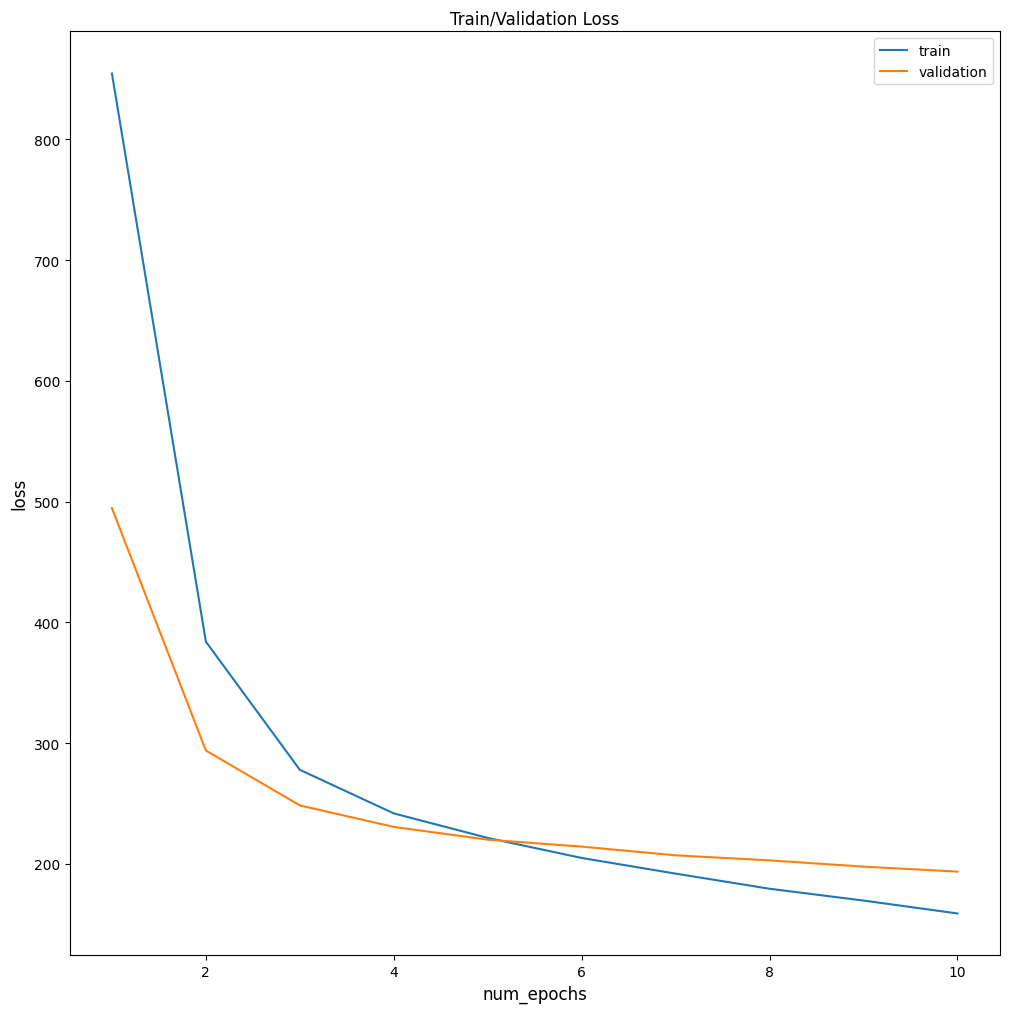

In [58]:
plot_graph(n_epochs)

In [59]:
torch.save(model,'bilstm_model')

## Deploy

In [60]:
### Predict a single example
def predict_single(x):
    # lower the text
    x = x.lower()
    # Clean the text
    x =  clean_text(x)
    # Clean Contractions
    x = fix_contractions(x)
    # tokenize
    x = tokenizer.texts_to_sequences([x])
    # pad
    x = pad_sequences(x, maxlen=maxlen)
    # create dataset
    x = torch.as_tensor(x, dtype=torch.long).cuda()

    pred = model(x).detach()
    pred = F.softmax(pred, dim=-1).cpu().numpy()

    pred = pred.argmax(axis=1)

    pred = le.classes_[pred]
    return pred[0]





In [61]:
import pandas as pd

def recommend_drugs(predicted_condition, df, top_n=5):
    """
    Recommend top drugs for a predicted condition based on positive reviews.

    Args:
        predicted_condition (str): The predicted condition.
        df (pd.DataFrame): The dataset containing drug reviews.
        top_n (int): Number of top drugs to recommend.

    Returns:
        pd.DataFrame: Top N drugs with the most positive reviews and highest ratings.
    """
    # Filter the dataset for the predicted condition
    condition_df = df[df['condition'] == predicted_condition]

    # Filter for positive reviews (e.g., rating >= 8)
    positive_reviews_df = condition_df[condition_df['rating'] >= 8]

    # Group by drug and calculate the number of positive reviews and average rating
    drug_stats = positive_reviews_df.groupby('drugName').agg(
        num_reviews=('rating', 'size'),  # Count the number of reviews
        avg_rating=('rating', 'mean')    # Calculate the average rating
    ).reset_index()

    # Sort by number of reviews and average rating
    drug_stats = drug_stats.sort_values(by=['num_reviews', 'avg_rating'], ascending=False)

    # Return the top N drugs
    return drug_stats.head(top_n)

# Example usage
# Load the dataset
df = pd.read_csv('/content/kuc-hackathon-winter-2018/versions/2/drugsComTrain_raw.csv')

# Predict a condition (for example, "Depression")
predicted_condition = "Acne"

# Recommend top drugs for the predicted condition
top_drugs = recommend_drugs(predicted_condition, df, top_n=5)
print(f"Top Recommended Drugs for {predicted_condition}:")
print(top_drugs)

Top Recommended Drugs for Acne:
                        drugName  num_reviews  avg_rating
57                  Isotretinoin          409    9.459658
6   Adapalene / benzoyl peroxide          272    9.169118
44                        Epiduo          259    9.173745
2                       Accutane          253    9.561265
39                   Doxycycline          231    9.095238


In [62]:
x = data['review'].values[20]
print(x)

"Spring of 2008 I was hospitalized with pnuemonia and diagnosed with Lyme diease and full blown AIDS with CD4 count of &quot;11&quot; viral load some number so high in the millions I could never remember. I was taking Combivir and Kaletra with Dapsone for the 1st year then it stopped working. I started Kaletra with the Dapsone my CD4 count is now 209 and rising. For a few weeks I was very aggressive and broke all my dishes in the house LOL. I take vitamin supplements and drink a boost pluz every day. LIfe is good now!"


In [63]:

predicted_condition = predict_single(x)

# Recommend top drugs for the predicted condition
top_drugs = recommend_drugs(predicted_condition, df, top_n=5)
print(f"Top Recommended Drugs for {predicted_condition}:")
print(top_drugs)

Top Recommended Drugs for Vaginal Yeast Infection:
       drugName  num_reviews  avg_rating
19  Tioconazole          211    9.303318
8    Miconazole          139    9.050360
4   Fluconazole          106    9.396226
3      Diflucan           31    9.516129
18  Terconazole           22    9.363636


In [64]:
data.condition.values[20]

'HIV Infection'

In [65]:
x = data['review'].values[1]
print(x)

"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective."


In [66]:

predicted_condition = predict_single(x)

# Recommend top drugs for the predicted condition
top_drugs = recommend_drugs(predicted_condition, df, top_n=5)
print(f"Top Recommended Drugs for {predicted_condition}:")
print(top_drugs)

Top Recommended Drugs for ADHD:
                           drugName  num_reviews  avg_rating
27                 Lisdexamfetamine          280    9.150000
46                          Vyvanse          271    9.210332
5   Amphetamine / dextroamphetamine          265    9.192453
32                  Methylphenidate          242    9.165289
0                          Adderall          127    9.338583


In [67]:
data.condition.values[1]

'ADHD'

In [68]:
x = data['review'].values[7]
print(x)

"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."


In [69]:

predicted_condition = predict_single(x)

# Recommend top drugs for the predicted condition
top_drugs = recommend_drugs(predicted_condition, df, top_n=5)
print(f"Top Recommended Drugs for {predicted_condition}:")
print(top_drugs)

Top Recommended Drugs for Bipolar Disorde:
       drugName  num_reviews  avg_rating
36  Lamotrigine          325    9.393846
34     Lamictal          239    9.430962
50   Quetiapine          184    9.152174
42   Lurasidone          162    9.265432
37       Latuda          156    9.237179


In [70]:
data.condition.values[7]

'Bipolar Disorde'

# Our model is providing 85% validation accuracy on correctly able to identify the condition classes.

In [71]:
# The End

In [72]:
# Example inputs for the specified conditions
texts = [
    # Birth Control
    "I have been taking birth control pills for a few months now, and they are working well for me.",
    # Depression
    "I feel extremely sad and hopeless, and I don't enjoy things I used to love.",
    # Pain
    "I have been experiencing severe back pain for the past week, and it's not getting better.",
    # Anxiety
    "I feel constantly worried and nervous, and it's affecting my daily life.",
    # Acne
    "I have been struggling with acne for years, and nothing seems to work.",
    # Bipolar Disorde
    "I have extreme mood swings, from feeling very happy to very depressed.",
    # Insomnia
    "I have trouble falling asleep and staying asleep at night.",
    # Weight Loss
    "I have been trying to lose weight, but I'm not seeing any results.",
    # Obesity
    "I have been struggling with obesity for a long time, and it's affecting my health.",
    # ADHD
    "I have trouble focusing on tasks and often feel restless.",
    # Diabetes, Type 2
    "I have been diagnosed with type 2 diabetes, and I'm struggling to manage my blood sugar levels.",
    # Emergency Contraception
    "I took emergency contraception after unprotected sex, and I'm worried about the side effects.",
    # High Blood Pressure
    "I have been diagnosed with high blood pressure, and I'm trying to manage it with medication.",
    # Vaginal Yeast Infection
    "I have been experiencing itching and discomfort in my vaginal area, and I think it might be a yeast infection."
]

# Expected outputs
for text in texts:
    print(f"Input: {text}")
    print(f"Predicted Condition: {predict_single(text)}")
    print()

Input: I have been taking birth control pills for a few months now, and they are working well for me.
Predicted Condition: Birth Control

Input: I feel extremely sad and hopeless, and I don't enjoy things I used to love.
Predicted Condition: Depression

Input: I have been experiencing severe back pain for the past week, and it's not getting better.
Predicted Condition: Pain

Input: I feel constantly worried and nervous, and it's affecting my daily life.
Predicted Condition: Depression

Input: I have been struggling with acne for years, and nothing seems to work.
Predicted Condition: Acne

Input: I have extreme mood swings, from feeling very happy to very depressed.
Predicted Condition: Birth Control

Input: I have trouble falling asleep and staying asleep at night.
Predicted Condition: Insomnia

Input: I have been trying to lose weight, but I'm not seeing any results.
Predicted Condition: Obesity

Input: I have been struggling with obesity for a long time, and it's affecting my health.

In [73]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import DataLoader, TensorDataset

# Ensure the model is in evaluation mode
model.eval()

# Convert test data to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Move model and data to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Create a DataLoader for the test data
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

# Make predictions in batches with mixed precision
y_pred_classes = []
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        with torch.amp.autocast(device_type='cuda', dtype=torch.float16):  # Enable mixed precision
            outputs = model(inputs)
        _, preds = torch.max(outputs, dim=1)
        y_pred_classes.extend(preds.cpu().numpy())

y_pred_classes = np.array(y_pred_classes)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

Model Accuracy: 86.43%

Classification Report:
                         precision    recall  f1-score   support

                   ADHD       0.90      0.85      0.87      1353
                   Acne       0.93      0.90      0.91      2231
                Anxiety       0.77      0.74      0.75      2344
        Bipolar Disorde       0.81      0.70      0.76      1681
          Birth Control       0.97      0.98      0.98     11531
             Depression       0.73      0.80      0.76      3649
       Diabetes, Type 2       0.88      0.84      0.86      1009
Emergency Contraception       0.98      0.96      0.97       987
    High Blood Pressure       0.75      0.87      0.81       931
               Insomnia       0.84      0.86      0.85      1471
                Obesity       0.55      0.65      0.60      1427
                   Pain       0.90      0.94      0.92      2474
Vaginal Yeast Infection       0.95      0.94      0.95       925
            Weight Loss       0.65      0.

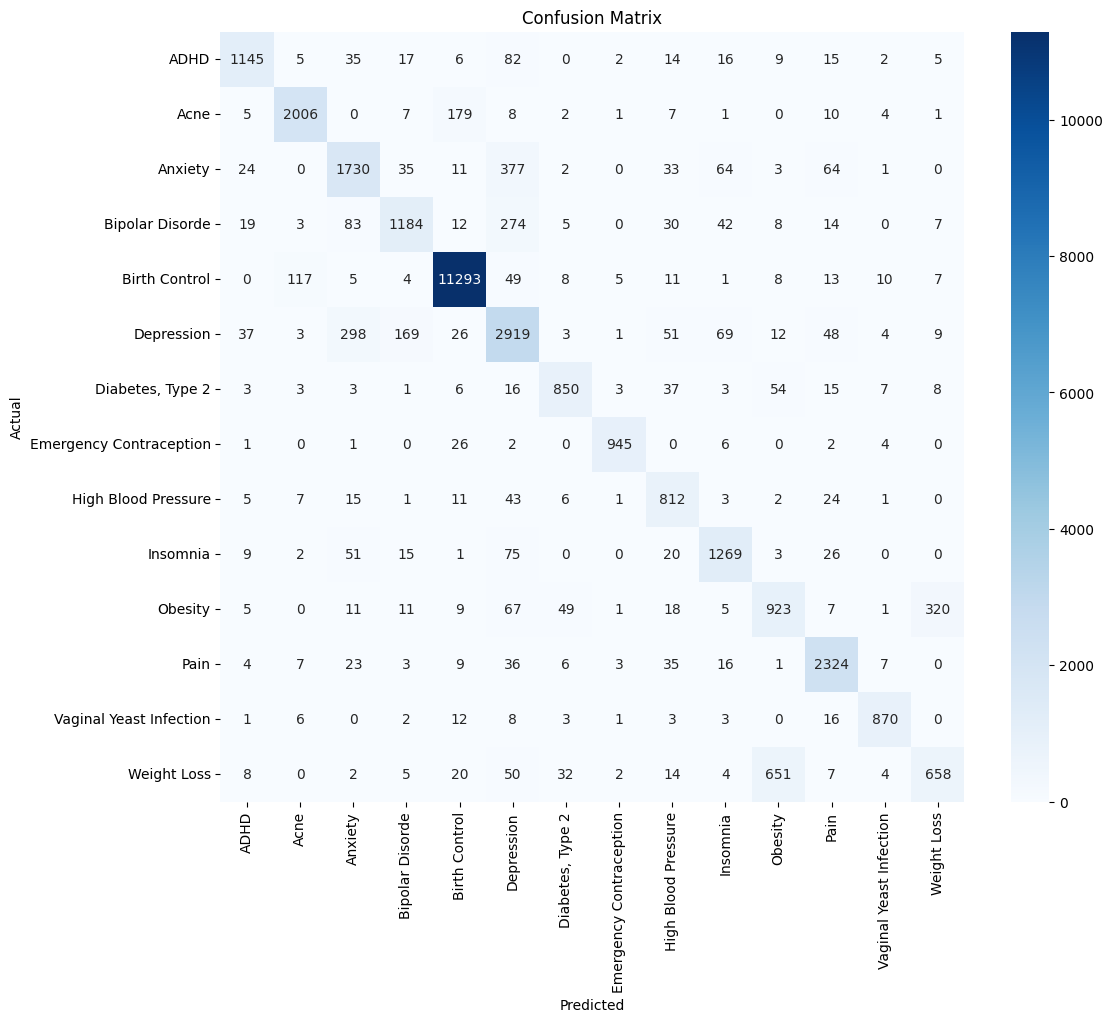

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()